# Extraccion de datos de las pruebas de audicion.

Como primer paso instalamos las librerias necesarias para realizar el procesos ETL.

In [1]:
# Instalar paquetes necesarios (ejecutar solo la primera vez)
# test push
using Pkg
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librerías
using DataFrames        # Manipulación y análisis de datos
using CSV              # Lectura y escritura de archivos CSV
using Dates            # Manejo de fechas y tiempos
using JSON3            # Manejo de datos JSON
using Logging          # Sistema de logs
using Statistics       # Funciones estadísticas básicas

# Configuración de logging para monitorear el pipeline
logger = ConsoleLogger(stdout, Logging.Info)
global_logger(logger)

println("✅ Librerías cargadas exitosamente")

ArgumentError: ArgumentError: Package JSON3 not found in current path.
- Run `import Pkg; Pkg.add("JSON3")` to install the JSON3 package.

# Instalar paquetes necesarios (ejecutar solo la primera vez)
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librerías


In [2]:
df = CSV.read("..\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 
println("✅ Datos cargados exitosamente")

✅ Datos cargados exitosamente


# 1. Extracción de datos
Como primer paso del proceso ETL (Extracción, Transformación y Carga), se procede a extraer la información más relevante desde nuestra base de datos. Esta etapa consiste en identificar y recuperar los datos necesarios que serán utilizados en las siguientes fases del proceso, asegurando que se obtenga información precisa y útil para el análisis posterior.

# Primer vistazo a los datos

Antes de realizar cualquier transformación, es útil observar una muestra de los datos contenidos en la base de datos. Para ello, utilizamos la función first, que nos permite visualizar las primeras filas del DataFrame y así tener una idea general de su contenido, estructura y posibles inconsistencias.

In [15]:
# Mostrar las primeras 20 filas del DataFrame
first(df, 20)

Row,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
,String15,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String1?,Int64,Int64,String3?,String
1,12-FEB-2007,1,10,5,5,15,5,0,20,20,20,10,10,25,30,45,M,331512,4,MA,Steel Investment Foundries
2,29-FEB-2008,2,15,5,15,20,20,15,15,10,0,10,15,30,20,15,M,331512,3,MA,Steel Investment Foundries
3,08-FEB-2006,3,25,20,15,20,35,25,15,20,20,10,15,40,30,30,M,331512,3,MA,Steel Investment Foundries
4,29-FEB-2008,6,10,10,10,35,50,30,10,10,10,5,30,35,25,20,M,331512,4,MA,Steel Investment Foundries
5,08-FEB-2006,8,15,15,5,15,45,30,20,15,15,5,40,50,20,5,M,331512,3,MA,Steel Investment Foundries
6,29-FEB-2008,9,10,5,0,5,15,15,15,5,0,5,5,5,5,20,M,331512,3,MA,Steel Investment Foundries
7,29-FEB-2008,10,5,0,5,5,5,10,0,10,5,5,5,5,5,0,M,331512,2,MA,Steel Investment Foundries
8,29-FEB-2008,11,30,20,25,60,60,60,30,25,20,35,65,65,70,50,M,331512,5,MA,Steel Investment Foundries
9,29-FEB-2008,12,15,10,5,5,35,20,5,10,15,5,25,40,10,20,M,331512,3,MA,Steel Investment Foundries


# Columnas
Extraemos los nombres de las columnas de nuestra base de datos con el objetivo de identificarlas y comprender la estructura de la información disponible.

In [4]:
names(df)

21-element Vector{String}:
 "test_date"
 "nid"
 "L500k"
 "L1k"
 "L2k"
 "L3k"
 "L4k"
 "L6k"
 "L8k"
 "R500k"
 ⋮
 "R3k"
 "R4k"
 "R6k"
 "R8k"
 "gender"
 "naics"
 "age_group"
 "region"
 "NAICS_descr"

# Identificación de datos faltantes

Utilizamos el siguiente código para identificar valores vacíos o faltantes dentro de las columnas de nuestra base de datos. Este análisis es fundamental para evaluar la calidad de los datos disponibles y tomar decisiones informadas sobre su limpieza o tratamiento en fases posteriores del proceso ETL.

In [3]:
using CSV, DataFrames, Plots

df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 


# Revisar valores faltantes
missing_report = DataFrame(
    columna = names(df),
    n_missing = [sum(ismissing.(df[!, c])) for c in names(df)]
)

missing_report

Row,columna,n_missing
,String,Int64
1,test_date,0
2,nid,0
3,L500k,56
4,L1k,66
5,L2k,61
6,L3k,61
7,L4k,34
8,L6k,77
9,L8k,2286


# Identificación de tipos de datos y dimensiones de la base de datos

En esta etapa del proceso de extracción, utilizamos el siguiente código para identificar el tipo de datos establecido en cada columna de la base de datos, lo cual nos permite comprender la naturaleza de la información (por ejemplo, numérica, texto, fecha, etc.) y aplicar transformaciones adecuadas en fases posteriores. Además, determinamos el número total de columnas y filas presentes en la base de datos, lo que nos brinda una visión general de su tamaño y estructura actual.

In [9]:

# Crear un DataFrame con los nombres de las columnas y sus tipos
tipos = DataFrame(
    Columna = names(df),
    Tipo = eltype.(eachcol(df))
)

# Mostrar la tabla
println(tipos)


# Numero de columnas y filas 
println("")
println("Numero de Filas y Columnas")
println(size(df))

21×2 DataFrame
 Row │ Columna      Tipo                    
     │ String       Type                    
─────┼──────────────────────────────────────
   1 │ test_date    String15
   2 │ nid          Int64
   3 │ L500k        Union{Missing, Int64}
   4 │ L1k          Union{Missing, Int64}
   5 │ L2k          Union{Missing, Int64}
   6 │ L3k          Union{Missing, Int64}
   7 │ L4k          Union{Missing, Int64}
   8 │ L6k          Union{Missing, Int64}
   9 │ L8k          Union{Missing, Int64}
  10 │ R500k        Union{Missing, Int64}
  11 │ R1k          Union{Missing, Int64}
  12 │ R2k          Union{Missing, Int64}
  13 │ R3k          Union{Missing, Int64}
  14 │ R4k          Union{Missing, Int64}
  15 │ R6k          Union{Missing, Int64}
  16 │ R8k          Union{Missing, Int64}
  17 │ gender       Union{Missing, String1}
  18 │ naics        Int64
  19 │ age_group    Int64
  20 │ region       Union{Missing, String3}
  21 │ NAICS_descr  String

Numero de Filas y Columnas
(1114966, 21

# Análisis estadístico básico
Utilizando la función describe, realizamos un análisis estadístico básico de los datos contenidos en nuestra base de datos. Esta función nos permite calcular métricas como la media, la moda, el mínimo, el máximo, entre otros valores estadísticos relevantes

In [11]:
# Resumen estadístico
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,test_date,,01-APR-2000,,31-OCT-2008,0,String15
2,nid,1.79337e6,1,2.31198e6,3214191,0,Int64
3,L500k,9.5332,-10,10.0,999,56,"Union{Missing, Int64}"
4,L1k,8.79378,-10,5.0,999,66,"Union{Missing, Int64}"
5,L2k,11.382,-10,10.0,999,61,"Union{Missing, Int64}"
6,L3k,16.8182,-10,10.0,999,61,"Union{Missing, Int64}"
7,L4k,21.3242,-10,15.0,999,34,"Union{Missing, Int64}"
8,L6k,24.2257,-10,20.0,999,77,"Union{Missing, Int64}"
9,L8k,298.223,-10,25.0,999,2286,"Union{Missing, Int64}"


# 2. Transformación de datos
En esta etapa del proceso ETL, aplicamos diversas técnicas para limpiar, modificar y estructurar los datos extraídos previamente, con el fin de prepararlos para su análisis o carga en sistemas de destino. La transformación puede incluir tareas como la normalización de valores, el manejo de datos faltantes, la conversión de tipos de datos, la creación de nuevas columnas derivadas, y la eliminación de registros duplicados o irrelevantes.

# Identificación de columnas con códigos especiales

Antes de realizar la limpieza de datos, es importante identificar cuáles columnas contienen valores especiales como 997, 998 o 999, que suelen representar respuestas inválidas, desconocidas o no aplicables. Esta verificación nos permite determinar el alcance del problema y enfocar las transformaciones en las columnas afectadas. Una vez identificadas, estos valores serán reemplazados por missing para tratarlos adecuadamente en el proceso de imputación.

In [18]:
using DataFrames, CSV

# cargar base
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

# función para contar códigos especiales
function contar_codigos(df::DataFrame, codigos::Vector{Int})
    resultados = DataFrame(Columna = String[], Codigo = Int[], Frecuencia = Int[])
    
    for c in names(df)
        if eltype(df[!, c]) <: Union{Missing, Number}
            for codigo in codigos
                # ignorar missing en el conteo
                count_val = count(x -> x == codigo, skipmissing(df[!, c]))
                push!(resultados, (string(c), codigo, count_val))
            end
        end
    end
    
    return resultados
end

# codigos a buscar
codigos_especiales = [997, 998, 999]

# aplicar
resultados = contar_codigos(df, codigos_especiales)

# mostrar los primeros 20
first(resultados, 20)

Row,Columna,Codigo,Frecuencia
,String,Int64,Int64
1,nid,997,1
2,nid,998,0
3,nid,999,1
4,L500k,997,43
5,L500k,998,288
6,L500k,999,87
7,L1k,997,43
8,L1k,998,340
9,L1k,999,85


# Limpieza e imputación de datos faltantes

En esta etapa del proceso de transformación, aplicamos dos funciones clave para mejorar la calidad de los datos:

limpiar_codigos!: Esta función recorre todas las columnas numéricas del DataFrame y reemplaza los códigos especiales (997, 998, 999), que suelen representar valores inválidos o desconocidos, por missing. Esto permite tratar estos valores como datos faltantes de forma estándar en Julia.

imputar_media!: Una vez identificados los valores faltantes, esta función los reemplaza por la media de cada columna, calculada ignorando los missing. Si la columna contiene enteros, la media se redondea para mantener la consistencia del tipo de dato. Esta técnica de imputación ayuda a mantener la integridad del conjunto de datos sin eliminar registros.

In [1]:
using DataFrames, CSV, Statistics, StatsBase

# ----------------------------------------------------------------
# 1. Reemplazar códigos especiales
#    - 997 y 999 → missing
#    - 998 → 100 (valor máximo de la prueba)
# ----------------------------------------------------------------
function limpiar_codigos!(df::DataFrame)
    for c in names(df)
        if eltype(df[!, c]) <: Union{Missing, Number}
            df[!, c] = map(x -> ismissing(x) ? missing :
                                x == 997 || x == 999 ? missing :
                                x == 998 ? 100 : x, df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 2. Validar rangos de columnas de frecuencias (0–100)
# ----------------------------------------------------------------
function validar_rangos!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        if c in names(df)
            df[!, c] = map(x -> ismissing(x) ? missing :
                                x < 0 || x > 100 ? missing : x, df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 3. Imputar valores faltantes
#    - Numéricos → media por columna
#    - Categóricos → moda por columna
# ----------------------------------------------------------------
function imputar_missing!(df::DataFrame, columnas_numericas::Vector{Symbol}, columnas_categoricas::Vector{Symbol})
    for c in columnas_numericas
        if c in names(df)
            col = df[!, c]
            if any(ismissing, col)
                media = mean(skipmissing(col))
                df[!, c] = coalesce.(col, media)
            end
        end
    end

    for c in columnas_categoricas
        if c in names(df)
            col = df[!, c]
            if any(ismissing, col)
                moda = mode(skipmissing(col))
                df[!, c] = coalesce.(col, moda)
            end
        end
    end
end

# ----------------------------------------------------------------
# 4. Normalizar texto en mayúsculas
# ----------------------------------------------------------------
function normalizar_texto!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        if c in names(df)
            df[!, c] = uppercase.(df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 5. Eliminar filas con missing en columna clave
# ----------------------------------------------------------------
function eliminar_filas_nid!(df::DataFrame, col::Symbol)
    if col in names(df)
        dropmissing!(df, cols=[col])
    end
end

# ----------------------------------------------------------------
# Pipeline completo
# ----------------------------------------------------------------
function transformar_datos(path::String)
    df = CSV.read(path, DataFrame)

    println("🔧 Iniciando transformación de datos...")

    # Paso 1: reemplazar códigos especiales
    limpiar_codigos!(df)

    # Paso 2: validar rangos en frecuencias audiométricas
    columnas_frecuencias = [:L500k, :L1k, :L2k, :L3k, :L4k, :L6k, :L8k,
                            :R500k, :R1k, :R2k, :R3k, :R4k, :R6k, :R8k]
    validar_rangos!(df, columnas_frecuencias)

    # Paso 3: imputar faltantes
    columnas_categoricas = [:gender, :region]
    imputar_missing!(df, columnas_frecuencias, columnas_categoricas)

    # Paso 4: normalizar texto
    normalizar_texto!(df, [:gender, :region, :NAICS_descr])

    # Paso 5: eliminar filas con nid faltante
    eliminar_filas_nid!(df, :nid)

    println("✅ Transformación completada exitosamente.")
    return df
end

# ----------------------------------------------------------------
# Ejecutar
# ----------------------------------------------------------------
df = transformar_datos("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv")
first(df, 20) |> display


ArgumentError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.

# Normalización del esquema

Como parte de la transformación de datos, aplicamos una técnica de normalización del esquema que consiste en estandarizar los nombres de las columnas, reorganizar su orden y agregar metadatos relevantes. Esta práctica mejora la legibilidad, consistencia y compatibilidad del conjunto de datos con otros sistemas, como almacenes de datos o modelos analíticos. Además, facilita el mantenimiento y la trazabilidad del flujo de datos al incluir información como la fecha de procesamiento y la fuente de origen.

In [61]:
using DataFrames, Dates

# cargar base
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

function normalize_schema(df::DataFrame)::DataFrame
    # 1. Renombrar columnas
    column_rename_map = Dict(
        "NID" => "worker_id",
        "Age_group" => "age_group_code",
        "Gender" => "gender",
        "Region" => "region_code",
        "Test_date" => "test_date",
        "NAICS" => "naics_code",
        "NAICS_descr" => "naics_description",
        
        # Umbrales oído izquierdo
        "L500k" => "left_ear_500hz",
        "L1k" => "left_ear_1000hz",
        "L2k" => "left_ear_2000hz",
        "L3k" => "left_ear_3000hz",
        "L4k" => "left_ear_4000hz",
        "L6k" => "left_ear_6000hz",
        "L8k" => "left_ear_8000hz",

        # Umbrales oído derecho
        "R500k" => "right_ear_500hz",
        "R1k" => "right_ear_1000hz",
        "R2k" => "right_ear_2000hz",
        "R3k" => "right_ear_3000hz",
        "R4k" => "right_ear_4000hz",
        "R6k" => "right_ear_6000hz",
        "R8k" => "right_ear_8000hz"
    )

    # Renombrar solo columnas existentes
        for (old, new) in column_rename_map
            if old in names(df)
                rename!(df, old => new)
            end
        end


    # 2. Agregar metadatos
    df.processed_at = fill(Dates.now(), nrow(df))
    df.data_source = fill("user_database", nrow(df))

    # 3. Reordenar columnas
    new_column_order = [
        "worker_id", "age_group_code", "gender", "region_code", "test_date",
        "naics_code", "naics_description",
        "left_ear_500hz", "left_ear_1000hz", "left_ear_2000hz", "left_ear_3000hz",
        "left_ear_4000hz", "left_ear_6000hz", "left_ear_8000hz",
        "right_ear_500hz", "right_ear_1000hz", "right_ear_2000hz", "right_ear_3000hz",
        "right_ear_4000hz", "right_ear_6000hz", "right_ear_8000hz",
        "processed_at", "data_source"
    ]

    # Filtrar columnas que existen
    available_columns = filter(col -> col in names(df), new_column_order)
    return df[:, available_columns]
end

# Ejecutar la normalización
df_normalizado = normalize_schema(df)
first(df_normalizado, 10)


Row,gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source
,String1?,String15,String,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,DateTime,String
1,M,12-FEB-2007,Steel Investment Foundries,10,5,5,15,5,0,20,20,20,10,10,25,30,45,2025-09-07T16:46:13.719,user_database
2,M,29-FEB-2008,Steel Investment Foundries,15,5,15,20,20,15,15,10,0,10,15,30,20,15,2025-09-07T16:46:13.719,user_database
3,M,08-FEB-2006,Steel Investment Foundries,25,20,15,20,35,25,15,20,20,10,15,40,30,30,2025-09-07T16:46:13.719,user_database
4,M,29-FEB-2008,Steel Investment Foundries,10,10,10,35,50,30,10,10,10,5,30,35,25,20,2025-09-07T16:46:13.719,user_database
5,M,08-FEB-2006,Steel Investment Foundries,15,15,5,15,45,30,20,15,15,5,40,50,20,5,2025-09-07T16:46:13.719,user_database
6,M,29-FEB-2008,Steel Investment Foundries,10,5,0,5,15,15,15,5,0,5,5,5,5,20,2025-09-07T16:46:13.719,user_database
7,M,29-FEB-2008,Steel Investment Foundries,5,0,5,5,5,10,0,10,5,5,5,5,5,0,2025-09-07T16:46:13.719,user_database
8,M,29-FEB-2008,Steel Investment Foundries,30,20,25,60,60,60,30,25,20,35,65,65,70,50,2025-09-07T16:46:13.719,user_database
9,M,29-FEB-2008,Steel Investment Foundries,15,10,5,5,35,20,5,10,15,5,25,40,10,20,2025-09-07T16:46:13.719,user_database


# Agregación de atributos
Como parte de la transformación de datos, se implementó una agregación que consiste en crear una nueva columna derivada de los valores existentes en el conjunto de datos. En este caso, se calculó una categoría de pérdida auditiva (hearing_loss_category) a partir del promedio de las frecuencias evaluadas en cada oído.

In [62]:
using DataFrames, Statistics

# Función para categorizar pérdida auditiva
function score_hearing_loss(row)
    left_vals = [row.left_ear_500hz, row.left_ear_1000hz, row.left_ear_2000hz, row.left_ear_4000hz]
    right_vals = [row.right_ear_500hz, row.right_ear_1000hz, row.right_ear_2000hz, row.right_ear_4000hz]

    # Saltar si hay valores missing
    if any(ismissing, left_vals) || any(ismissing, right_vals)
        return "Unknown"
    end

    left_avg = mean(left_vals)
    right_avg = mean(right_vals)

    if left_avg < 25 && right_avg < 25
        return "Normal"
    elseif (25 <= left_avg < 40) || (25 <= right_avg < 40)
        return "Mild"
    elseif (40 <= left_avg < 55) || (40 <= right_avg < 55)
        return "Moderate"
    elseif (55 <= left_avg < 70) || (55 <= right_avg < 70)
        return "Moderately Severe"
    elseif (70 <= left_avg < 90) || (70 <= right_avg < 90)
        return "Severe"
    else
        return "Profound"
    end
end

# Aplicar la función al DataFrame normalizado
df_normalizado.hearing_loss_category = [score_hearing_loss(row) for row in eachrow(df_normalizado)]

# Verificar resultados
first(df_normalizado, 10)

Row,gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source,hearing_loss_category
,String1?,String15,String,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,DateTime,String,String
1,M,12-FEB-2007,Steel Investment Foundries,10,5,5,15,5,0,20,20,20,10,10,25,30,45,2025-09-07T16:46:13.719,user_database,Normal
2,M,29-FEB-2008,Steel Investment Foundries,15,5,15,20,20,15,15,10,0,10,15,30,20,15,2025-09-07T16:46:13.719,user_database,Normal
3,M,08-FEB-2006,Steel Investment Foundries,25,20,15,20,35,25,15,20,20,10,15,40,30,30,2025-09-07T16:46:13.719,user_database,Normal
4,M,29-FEB-2008,Steel Investment Foundries,10,10,10,35,50,30,10,10,10,5,30,35,25,20,2025-09-07T16:46:13.719,user_database,Normal
5,M,08-FEB-2006,Steel Investment Foundries,15,15,5,15,45,30,20,15,15,5,40,50,20,5,2025-09-07T16:46:13.719,user_database,Normal
6,M,29-FEB-2008,Steel Investment Foundries,10,5,0,5,15,15,15,5,0,5,5,5,5,20,2025-09-07T16:46:13.719,user_database,Normal
7,M,29-FEB-2008,Steel Investment Foundries,5,0,5,5,5,10,0,10,5,5,5,5,5,0,2025-09-07T16:46:13.719,user_database,Normal
8,M,29-FEB-2008,Steel Investment Foundries,30,20,25,60,60,60,30,25,20,35,65,65,70,50,2025-09-07T16:46:13.719,user_database,Mild
9,M,29-FEB-2008,Steel Investment Foundries,15,10,5,5,35,20,5,10,15,5,25,40,10,20,2025-09-07T16:46:13.719,user_database,Normal


A partir de este punto, contamos con los datos ya transformados y normalizados dentro del proceso ETL. Esto significa que la información se encuentra limpia, categorizada y lista para su explotación. Por ello, procedemos a la etapa de análisis y visualización, donde mediante gráficas representaremos la distribución de las categorías de pérdida auditiva.

# Graficos
Con el siguiente código generaremos la gráfica correspondiente a las frecuencias bajas, utilizando los datos ya normalizados. Esta visualización nos permitirá observar la distribución de los trabajadores en cada categoría de pérdida auditiva (Normal, Mild, Moderate, etc.),

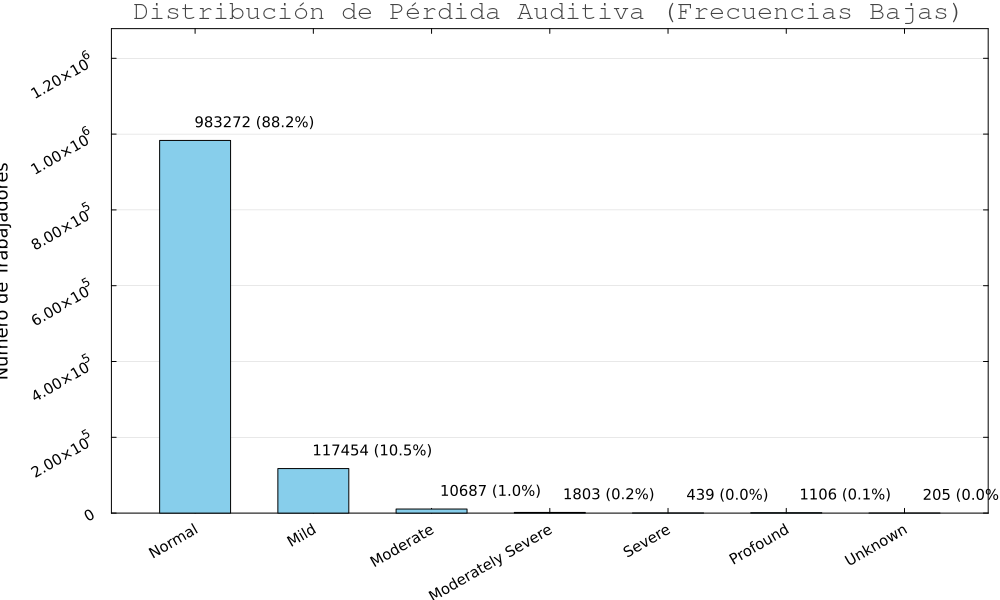

In [63]:
using DataFrames, Statistics, StatsBase, Plots

function graficar_perdida_auditiva(df_normalizado::DataFrame; columna::Symbol=:hearing_loss_category)
    # Contar las categorías
    counts = countmap(df_normalizado[!, columna])

    # Ordenar categorías según la lógica clínica
    categorias = ["Normal", "Mild", "Moderate", "Moderately Severe", "Severe", "Profound", "Unknown"]
    valores = [get(counts, cat, 0) for cat in categorias]

    # Calcular porcentajes
    total = sum(valores)
    porcentajes = round.(valores ./ total .* 100, digits=1)

    # Crear gráfico de barras verticales mejorado
    bar(
        categorias,
        valores;
        title="Distribución de Pérdida Auditiva (Frecuencias Bajas)",
        xlabel="Categoría de Pérdida Auditiva",
        ylabel="Número de Trabajadores",
        legend=false,
        color=:skyblue,
        linecolor=:black,
        bar_width=0.6,
        size=(1000, 600),
        ylims=(0, maximum(valores) * 1.3),
        rotation=30,
        grid=:y,
        framestyle=:box,
        tickfont=font(10),
        guidefont=font(12),
        titlefont=font(14, "Arial"),
    )

    # Añadir etiquetas de cantidad y porcentaje sobre cada barra
    for (i, (count, pct)) in enumerate(zip(valores, porcentajes))
        annotate!(i, count + maximum(valores) * 0.05, text("$(count) ($(pct)%)", :center, 10))
    end

    display(current())
end

graficar_perdida_auditiva(df_normalizado)



La gráfica muestra que la gran mayoría de los trabajadores (88,2%) se encuentran en la categoría Normal, es decir, no presentan pérdida auditiva en frecuencias bajas. Un 10,5% presenta pérdida auditiva leve (Mild), mientras que solo un pequeño porcentaje se distribuye en categorías de mayor severidad, siendo menos del 1,5% los casos entre Moderate, Moderately Severe, Severe y Profound. Esto indica que, en frecuencias bajas, la pérdida auditiva severa o profunda es poco frecuente dentro de la población analizada.

Nota: La presente gráfica corresponde al análisis de pérdida auditiva en el rango de frecuencias bajas, que comprende principalmente las frecuencias de 250 Hz y 500 Hz (en algunos casos extendiéndose hasta 1000 Hz). Este rango está asociado a los sonidos graves y permite identificar alteraciones auditivas que afectan la percepción de tonos bajos.

# FRECUENCIAS ALTAS
realizaremos el análisis de las frecuencias altas (6000 Hz y 8000 Hz), siguiendo la misma metodología aplicada previamente para las frecuencias bajas. De esta manera, podremos comparar cómo se comporta la pérdida auditiva en diferentes rangos de frecuencia y observar si existen patrones relevantes en la población evaluada. Para ello, presentamos la siguiente gráfica que resume la distribución de categorías de pérdida auditiva en este rango.

Calculando puntajes de pérdida auditiva (frecuencias altas)...
✅ Columna :hearing_loss_score_high_frequency creada.


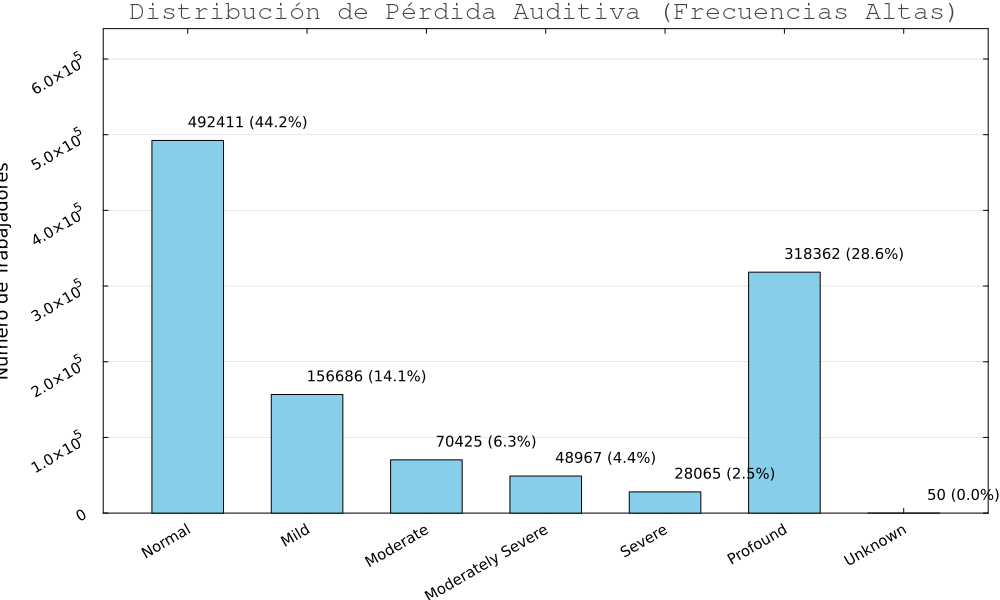

In [64]:
# 1️⃣ Versión que crea la columna y devuelve el DataFrame modificado
function calcular_perdida_auditiva_altas(df::DataFrame)
    println("Calculando puntajes de pérdida auditiva (frecuencias altas)...")

    left_avg = [
        let vals = collect(skipmissing([l6, l8]))
            isempty(vals) ? NaN : mean(vals)
        end
        for (l6, l8) in zip(df[!, "left_ear_6000hz"], df[!, "left_ear_8000hz"])
    ]

    right_avg = [
        let vals = collect(skipmissing([r6, r8]))
            isempty(vals) ? NaN : mean(vals)
        end
        for (r6, r8) in zip(df[!, "right_ear_6000hz"], df[!, "right_ear_8000hz"])
    ]

    worst_avg = max.(left_avg, right_avg)

    categorias_asignadas = [
        isnan(avg) ? "Unknown" :
        avg < 25 ? "Normal" :
        avg < 40 ? "Mild" :
        avg < 55 ? "Moderate" :
        avg < 70 ? "Moderately Severe" :
        avg < 90 ? "Severe" : "Profound"
        for avg in worst_avg
    ]

    df[!, :hearing_loss_score_high_frequency] = categorias_asignadas

    println("✅ Columna :hearing_loss_score_high_frequency creada.")
    return df
end


# 2️⃣ Versión que grafica (no modifica DataFrame, solo usa la columna existente)
function graficar_perdida_auditiva_altas_plot(df::DataFrame)
    counts = countmap(df[!, :hearing_loss_score_high_frequency])
    categorias = ["Normal", "Mild", "Moderate", "Moderately Severe", "Severe", "Profound", "Unknown"]
    valores = [get(counts, cat, 0) for cat in categorias]

    total = sum(valores)
    porcentajes = total > 0 ? round.(valores ./ total .* 100, digits=1) : fill(0.0, length(valores))

    p = bar(
        categorias, valores;
        title="Distribución de Pérdida Auditiva (Frecuencias Altas)",
        xlabel="Categoría de Pérdida Auditiva",
        ylabel="Número de Trabajadores",
        legend=false,
        color=:skyblue,
        linecolor=:black,
        bar_width=0.6,
        size=(1000, 600),
        ylims=(0, maximum(valores) * 1.3),
        rotation=30,
        grid=:y,
        framestyle=:box,
        tickfont=font(10),
        guidefont=font(12),
        titlefont=font(14, "Arial"),
    )

    for (i, (count, pct)) in enumerate(zip(valores, porcentajes))
        annotate!(p, i, count + maximum(valores) * 0.05, text("$(count) ($(pct)%)", :center, 10))
    end

    display(p)
    return nothing
end

# Paso 1: calcular y agregar la columna
df_normalizado = calcular_perdida_auditiva_altas(df_normalizado)

# Paso 2: graficar usando la nueva columna
graficar_perdida_auditiva_altas_plot(df_normalizado)


En la distribución de pérdida auditiva para frecuencias altas (6000 Hz y 8000 Hz) se observa que, aunque la mayor parte de los trabajadores mantiene una audición clasificada como Normal (44,2%), este porcentaje es considerablemente menor al encontrado en las frecuencias bajas. Llama la atención el aumento de casos en categorías de mayor severidad: un 28,6% de los trabajadores se ubica en la categoría Profound, lo cual evidencia un deterioro auditivo importante en este rango de frecuencias. Además, se identifican porcentajes relevantes en las categorías Mild (14,1%), Moderate (6,3%) y Moderately Severe (4,4%), lo que sugiere que la pérdida auditiva es más prevalente y severa en las frecuencias altas que en las bajas. Este patrón coincide con la literatura clínica, donde las frecuencias altas suelen verse más afectadas por factores como la exposición prolongada a ruido laboral.

# CARGA DE DATOS
Finalmente, en la etapa de carga (Load) procedemos a almacenar los datos ya transformados y enriquecidos con las nuevas variables de pérdida auditiva tanto en frecuencias bajas como en frecuencias altas. Este paso garantiza que la información procesada quede disponible para futuros análisis, reportes o integración con otras herramientas. Para este caso, los datos son exportados a un archivo en formato CSV, lo cual permite mantener un respaldo estructurado y fácilmente reutilizable en distintas fases del proyecto o en aplicaciones posteriores.

In [66]:
using DataFrames, CSV, Statistics, Logging

function load_auditiva_to_warehouse(df_normalizado::DataFrame; load_type::String="full")
    """
    Carga los datos de pérdida auditiva al Data Warehouse con diferentes estrategias.

    Args:
        df_normalizado (DataFrame): Datos normalizados de pérdida auditiva
        load_type (String): Tipo de carga ("full", "incremental", "upsert")

    Returns:
        Bool: true si la carga fue exitosa
    """
    try
        @info "Iniciando carga de datos auditivos - Tipo: $load_type"

        # Validaciones pre-carga
        if nrow(df_normalizado) == 0
            @warn "No hay datos para cargar"
            return false
        end

        println("--- Validaciones Pre-Carga ---")
        println("Registros a cargar: ", nrow(df_normalizado))
        println("Columnas: ", names(df_normalizado))

        # Verificar duplicados si hay columna única identificadora
        if "test_date" in names(df_normalizado)
            duplicates = nrow(df_normalizado) - length(unique(df_normalizado.test_date))
            if duplicates > 0
                println("⚠️  Encontrados $duplicates registros duplicados por fecha de test")
                df_normalizado = unique(df_normalizado, :test_date)
            end
        end

        # Definir nombre de archivo según el tipo de carga
        filename = ""
        if load_type == "full"
            filename = "warehouse_auditiva_full.csv"
            CSV.write(filename, df_normalizado)
            println("✅ Carga completa realizada: $filename")

        elseif load_type == "incremental"
            filename = "warehouse_auditiva_incremental.csv"
            CSV.write(filename, df_normalizado, append=true)
            println("✅ Carga incremental realizada: $filename")

        elseif load_type == "upsert"
            filename = "warehouse_auditiva_upsert.csv"
            CSV.write(filename, df_normalizado)
            println("✅ Upsert realizado: $filename")
        end

        # Reporte final
        println("\n--- Datos Cargados ---")
        println("Registros cargados exitosamente: ", nrow(df_normalizado))

        if isfile(filename)
            lines = readlines(filename)
            println("\nPrimeras filas del archivo cargado:")
            for (i, line) in enumerate(lines[1:min(6, length(lines))])
                println(line)
            end
        end

        # Estadísticas de carga relevantes
        println("\n--- Estadísticas de Carga ---")
        if "gender" in names(df_normalizado)
            println("👩‍🦱 Géneros únicos: ", unique(df_normalizado.gender))
        end
        if "hearing_loss_category" in names(df_normalizado)
            println("📊 Categorías auditivas: ", unique(df_normalizado.hearing_loss_category))
        end
        if "left_ear_4000hz" in names(df_normalizado)
            println("📉 Promedio 4000Hz oído izquierdo: ",
                round(mean(skipmissing(df_normalizado.left_ear_4000hz)), digits=2))
        end

        @info "Carga completada exitosamente: $(nrow(df_normalizado)) registros"
        return true

    catch e
        @error "Error en la carga: $e"
        return false
    end
end

load_auditiva_to_warehouse(df_normalizado, load_type="full")

--- Validaciones Pre-Carga ---
Registros a cargar: 1114966
Columnas: 

┌ Info: Iniciando carga de datos auditivos - Tipo: full
└ @ Main c:\Users\USUARIO\Downloads\proyecto xd\Proyecto_ingenieria_datos\notebooks\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:15


["gender", "test_date", "naics_description", "left_ear_500hz", "left_ear_1000hz", "left_ear_2000hz", "left_ear_3000hz", "left_ear_4000hz", "left_ear_6000hz", "left_ear_8000hz", "right_ear_500hz", "right_ear_1000hz", "right_ear_2000hz", "right_ear_3000hz", "right_ear_4000hz", "right_ear_6000hz", "right_ear_8000hz", "processed_at", "data_source", "hearing_loss_category", "hearing_loss_score_high_frequency"]
⚠️  Encontrados 1111829 registros duplicados por fecha de test
✅ Carga completa realizada: warehouse_auditiva_full.csv

--- Datos Cargados ---
Registros cargados exitosamente: 3137

Primeras filas del archivo cargado:
gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source,hearing_loss_category,hearing_loss_score_high_frequency
M,12-FEB-2007,Steel Investme

┌ Info: Carga completada exitosamente: 3137 registros
└ @ Main c:\Users\USUARIO\Downloads\proyecto xd\Proyecto_ingenieria_datos\notebooks\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:79


true

# PIPELINE 

El pipeline diseñado integra de manera estructurada las tres fases principales del proceso ETL (Extracción, Transformación y Carga) aplicado a los datos auditivos. En la etapa de extracción, se toma como fuente la base de datos original Paper1_WebData_Final.csv, asegurando la obtención de la información en bruto. Posteriormente, en la fase de transformación, se realizan los cálculos necesarios para clasificar la pérdida auditiva tanto en frecuencias bajas como en frecuencias altas, generando nuevas variables que enriquecen el análisis clínico de los registros. Finalmente, en la etapa de carga, los datos transformados se validan, se depuran de duplicados y se almacenan en un archivo consolidado (warehouse_auditiva_full.csv), el cual se convierte en la base limpia y lista para futuros análisis y visualizaciones. De esta forma, el pipeline no solo automatiza el flujo de trabajo, sino que también garantiza la calidad y consistencia de la información auditiva.

In [ ]:
using CSV, DataFrames, Statistics, StatsBase, Plots

# ==========================
# 1. EXTRACCIÓN
# ==========================
function extract_data()::DataFrame
    filepath = "..\\data\\raw\\Paper1_WebData_Final.csv"
    @info "Extrayendo datos desde $filepath..."
    df = CSV.read(filepath, DataFrame)
    println("✅ Datos extraídos: ", nrow(df), " registros")
    return df
end

# ==========================
# 2. TRANSFORMACIÓN
# ==========================

# Transformación de frecuencias bajas
function calcular_perdida_auditiva_bajas(df::DataFrame)::DataFrame
    df = copy(df)
    @info "Calculando pérdida auditiva (frecuencias bajas)..."

    left_avg = mean.(eachrow(df[:, [:left_ear_500hz, :left_ear_1000hz, :left_ear_2000hz]]))
    right_avg = mean.(eachrow(df[:, [:right_ear_500hz, :right_ear_1000hz, :right_ear_2000hz]]))
    worst_avg = max.(left_avg, right_avg)

    df.hearing_loss_category = similar(worst_avg, String)

    for i in 1:length(worst_avg)
        avg = worst_avg[i]
        if avg < 25
            df.hearing_loss_category[i] = "Normal"
        elseif avg < 40
            df.hearing_loss_category[i] = "Mild"
        elseif avg < 55
            df.hearing_loss_category[i] = "Moderate"
        elseif avg < 70
            df.hearing_loss_category[i] = "Moderately Severe"
        elseif avg < 90
            df.hearing_loss_category[i] = "Severe"
        else
            df.hearing_loss_category[i] = "Profound"
        end
    end

    return df
end

# Transformación de frecuencias altas
function calcular_perdida_auditiva_altas(df::DataFrame)::DataFrame
    df = copy(df)
    @info "Calculando pérdida auditiva (frecuencias altas)..."

    left_avg = mean.(eachrow(df[:, [:left_ear_6000hz, :left_ear_8000hz]]))
    right_avg = mean.(eachrow(df[:, [:right_ear_6000hz, :right_ear_8000hz]]))
    worst_avg = max.(left_avg, right_avg)

    df.hearing_loss_high_freq = similar(worst_avg, String)

    for i in 1:length(worst_avg)
        avg = worst_avg[i]
        if avg < 25
            df.hearing_loss_high_freq[i] = "Normal"
        elseif avg < 40
            df.hearing_loss_high_freq[i] = "Mild"
        elseif avg < 55
            df.hearing_loss_high_freq[i] = "Moderate"
        elseif avg < 70
            df.hearing_loss_high_freq[i] = "Moderately Severe"
        elseif avg < 90
            df.hearing_loss_high_freq[i] = "Severe"
        else
            df.hearing_loss_high_freq[i] = "Profound"
        end
    end

    return df
end

# ==========================
# 3. CARGA
# ==========================
function load_auditiva_to_warehouse(df::DataFrame; load_type::String="full")
    try
        @info "Iniciando carga de datos auditivos - Tipo: $load_type"

        if nrow(df) == 0
            @warn "No hay datos para cargar"
            return false
        end

        println("--- Validaciones Pre-Carga ---")
        println("Registros a cargar: ", nrow(df))
        println("Columnas: ", names(df))

        # Verificar duplicados (ejemplo con test_date + gender como clave)
        duplicates = nrow(df) - nrow(unique(df, [:test_date, :gender]))
        if duplicates > 0
            println("⚠️  Encontrados $duplicates registros duplicados")
            df = unique(df, [:test_date, :gender])
        end

        filename = "warehouse_auditiva_full.csv"
        CSV.write(filename, df)
        println("✅ Carga completa realizada: $filename")

        println("\n--- Datos Cargados ---")
        println("Registros cargados exitosamente: ", nrow(df))
        println("Primeras filas del archivo de destino:")
        show(first(df, 5))

        @info "Carga completada exitosamente"
        return true

    catch e
        @error "Error en la carga: $e"
        return false
    end
end

# ==========================
# 4. PIPELINE COMPLETO
# ==========================
function run_pipeline()
    println("🚀 Iniciando Pipeline ETL de datos auditivos...")

    # 1. Extracción
    df = extract_data()

    # 2. Transformación
    df = calcular_perdida_auditiva_bajas(df)
    df = calcular_perdida_auditiva_altas(df)

    # 3. Carga
    success = load_auditiva_to_warehouse(df, load_type="full")

    if success
        println("✅ Pipeline completado correctamente")
    else
        println("❌ Pipeline fallido")
    end
end
